# Resnet110+CBAM on  Cifar10 dataset testing


### **Step#1**: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#############################################
import tensorflow as tf
import keras
#################################
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.models import Model
from keras.layers import Lambda
from keras.datasets import cifar10
#############################################
from models import resnet_v1 
from models.utils import lr_schedule, get_label
print("tensorflow_version",tf.__version__)
print("keras_version",keras.__version__)


tensorflow_version 2.15.0
keras_version 2.15.0


### **Step#2**: load ResNet110+CBAM model and weights

In [2]:

# Load the ResNet-110 model with CBAM layers
resnet110CBAM_model = load_model("saved_models\cifar10_resnet110_cbam_block_model.h5")
resnet110CBAM_model.load_weights("saved_models\cifar10_resnet110_cbam_block_model.h5")
# summarize model.
resnet110CBAM_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 16)           0         ['batch_normalization[0]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.297171 to fit



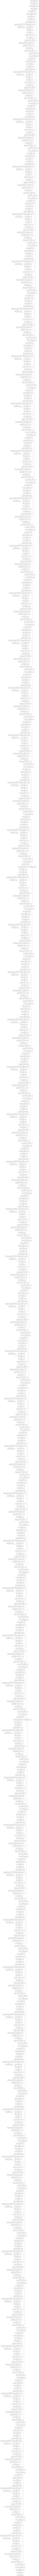

In [3]:
## Ensure the train and test directories exist
#os.makedirs(CNNmodel_dirPath, exist_ok=True)

import pydotplus.graphviz as gv

# Specify the GraphViz executable path
gv.find_graphviz()

# Now try to plot the model
from keras.utils import plot_model
plot_model(resnet110CBAM_model, show_shapes=True)


 ### **Step#3**: Load CIFAR-10 dataset and Split the data into training and testing sets

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### **Step#4**: Visualize the CIFAR-10 dataset

In [5]:
labels_mapping = [ "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [6]:
# Create a dictionary that maps each label to its index
label_to_index = {label: index for label,index in enumerate(labels_mapping)}
print(label_to_index)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


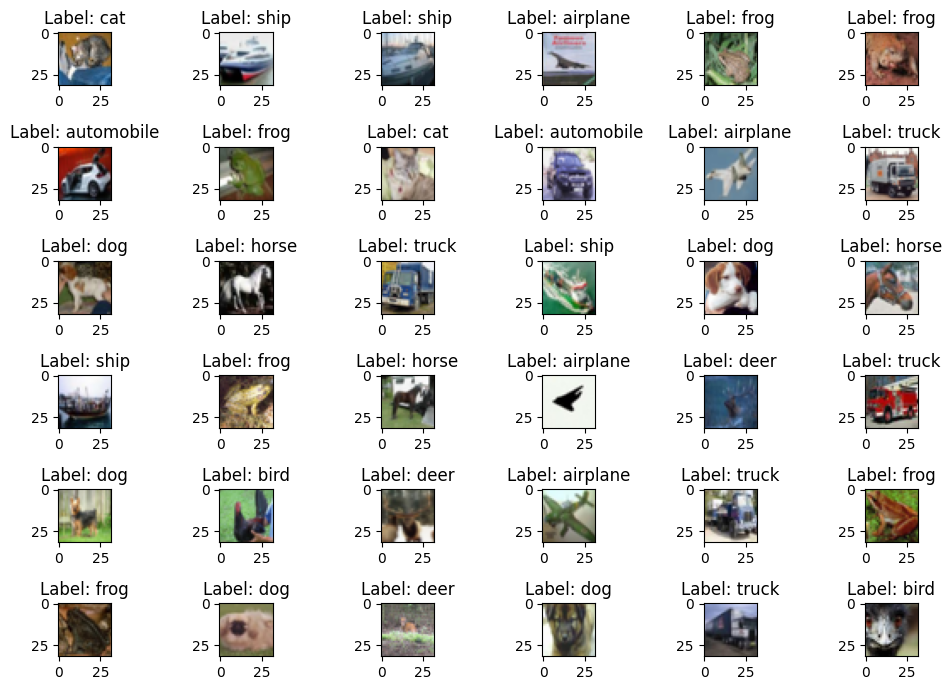

In [7]:
fig, ax = plt.subplots(6, 6, figsize=(10, 7)) 
k = 0
for i in range(6): 
    for j in range(6): 
        ax[i][j].imshow(test_images[k].reshape(32, 32,3))#, aspect='auto') 
        arr = np.array(test_labels[k]).item()
        label_for_index = label_to_index.get(arr, "Index not found")
        ax[i][j].set_title('Label: {}'.format(label_for_index))
        k += 1

plt.tight_layout()
plt.show()


120
 Image 120 is [8],Invalid key


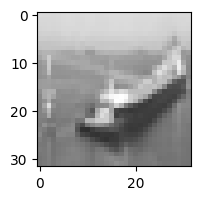

In [8]:

indexx=120
my_image1 = test_images[indexx]
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
plt.imshow(my_image1)
arr = np.array(test_labels[indexx]).item()
print(indexx)
label_for_index = get_label(indexx)
print(f" Image {indexx} is {test_labels[indexx]},{label_for_index}")


In [9]:
# Normalize data.
my_image  = my_image1 / 255.0 # Normalize pixel values to between 0 and 1
print(my_image)

[[[0.85490196 0.85490196 0.85490196]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]]

 [[0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84705882 0.84705882 0.84705882]]

 [[0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  [0.83921569 0.83921569 0.83921569]]

 ...

 [[0.46666667 0.46666667 0.46666667]
  [0.4745098  0.4745098  0.4745098 ]
  [0.50196078 0.50196078 0.50196078]
  ...
  [0.4745098  0.4745098  0.4745098 ]
  [0.45882353 0.45882353 0.45882353]
  [0.45098039 0.45098039 0.45098039]]

 [[0.45490196 0.45490196 0.45490196]
  [0.47058824 0.47058824 0.47058824]


In [10]:
my_image.shape

(32, 32, 3)

In [11]:
my_image= np.expand_dims(my_image, axis=0)

In [12]:
# Extracting architecture details
archit = []

for layer in resnet110CBAM_model.layers:
    layer_type = layer.name
    archit.append((layer_type))

attention_maps_layer=[]
for att_map in archit:
    if att_map.split("_")[0] == "spartialMap" :
        attention_maps_layer.append(att_map)


feature_maps_layer=[]
for fea_map in archit:
    if fea_map.split("_")[0] == "refined" :
        feature_maps_layer.append(fea_map)


print(archit)
print(attention_maps_layer)
print(feature_maps_layer)

['input_1', 'conv2d', 'batch_normalization', 'activation', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'global_average_pooling2d', 'global_max_pooling2d', 'reshape', 'reshape_1', 'dense', 'dense_1', 'add', 'activation_2', 'channelMap_1', 'lambda', 'lambda_1', 'concatenate', 'conv2d_3', 'spartialMap_1', 'add_1', 'refined_feature_map_1', 'conv2d_4', 'batch_normalization_3', 'activation_3', 'conv2d_5', 'batch_normalization_4', 'global_average_pooling2d_1', 'global_max_pooling2d_1', 'reshape_2', 'reshape_3', 'dense_2', 'dense_3', 'add_2', 'activation_4', 'channelMap_2', 'lambda_2', 'lambda_3', 'concatenate_1', 'conv2d_6', 'spartialMap_2', 'add_3', 'refined_feature_map_2', 'conv2d_7', 'batch_normalization_5', 'activation_5', 'conv2d_8', 'batch_normalization_6', 'global_average_pooling2d_2', 'global_max_pooling2d_2', 'reshape_4', 'reshape_5', 'dense_4', 'dense_5', 'add_4', 'activation_6', 'channelMap_3', 'lambda_4', 'lambda_5', 'concatenate_2', '

In [13]:
feature_maps_resnet20CBAM_list=[]
for feat_layer_name in feature_maps_layer:
    feature_maps_resnet20CBAM = Model(inputs=resnet110CBAM_model.input, outputs=resnet110CBAM_model.get_layer(feat_layer_name).output)
    feature_maps_resnet20CBAM_list.append(feature_maps_resnet20CBAM)

print(feature_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x000001A435DF80D0>, <keras.src.engine.functional.Functional object at 0x000001A4382A66D0>, <keras.src.engine.functional.Functional object at 0x000001A435F061D0>, <keras.src.engine.functional.Functional object at 0x000001A435F12B50>, <keras.src.engine.functional.Functional object at 0x000001A4382A1110>, <keras.src.engine.functional.Functional object at 0x000001A43838F950>, <keras.src.engine.functional.Functional object at 0x000001A438381150>, <keras.src.engine.functional.Functional object at 0x000001A435F2AC10>, <keras.src.engine.functional.Functional object at 0x000001A435F41B10>, <keras.src.engine.functional.Functional object at 0x000001A435F56B10>, <keras.src.engine.functional.Functional object at 0x000001A435F6D850>, <keras.src.engine.functional.Functional object at 0x000001A435F6CB10>, <keras.src.engine.functional.Functional object at 0x000001A435FAC9D0>, <keras.src.engine.functional.Functional object at 0x000001A435FD9050>, <kera

In [14]:
feature_map=[]
for feature_maps_resnet20CBAM in feature_maps_resnet20CBAM_list:
    feature_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    feature_map.append(feature_mapofImage)


1/1 [==============================] - 13s 13s/step


In [15]:
attention_maps_resnet20CBAM_list=[]
for att_layer_name in attention_maps_layer:
    atteention_maps_resnet20CBAM = Model(inputs=resnet110CBAM_model.input, outputs=resnet110CBAM_model.get_layer(att_layer_name).output)
    attention_maps_resnet20CBAM_list.append(atteention_maps_resnet20CBAM)

print(attention_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x000001A4B26B6C50>, <keras.src.engine.functional.Functional object at 0x000001A42A58F610>, <keras.src.engine.functional.Functional object at 0x000001A507A7A910>, <keras.src.engine.functional.Functional object at 0x000001A50E5F2E50>, <keras.src.engine.functional.Functional object at 0x000001A50E63A410>, <keras.src.engine.functional.Functional object at 0x000001A428F3FB50>, <keras.src.engine.functional.Functional object at 0x000001A50E4FC590>, <keras.src.engine.functional.Functional object at 0x000001A50E64EF50>, <keras.src.engine.functional.Functional object at 0x000001A4F8D62B50>, <keras.src.engine.functional.Functional object at 0x000001A50E62B810>, <keras.src.engine.functional.Functional object at 0x000001A50E650D50>, <keras.src.engine.functional.Functional object at 0x000001A50E6A0B90>, <keras.src.engine.functional.Functional object at 0x000001A428FB5310>, <keras.src.engine.functional.Functional object at 0x000001A50E1F53D0>, <kera

In [16]:
attention_map=[]
for feature_maps_resnet20CBAM in attention_maps_resnet20CBAM_list:
    attention_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    attention_map.append(attention_mapofImage)


1/1 [==============================] - 12s 12s/step


In [17]:
predict_resnet110CBAM_model= resnet110CBAM_model.predict(my_image)
print(predict_resnet110CBAM_model)

predicted_class=[]
for predict in predict_resnet110CBAM_model:
    pred=predict.tolist()
    # Get the index of the highest probability
    max_index = pred.index(max(pred))
    mapped_range = get_label(max_index)
    predicted_class.append(mapped_range)

print("predicated class: ",(predicted_class))

1/1 [==============================] - 17s 17s/step
[[1.6758666e-05 6.2988043e-10 8.7648243e-11 7.0056266e-10 6.5164368e-10
  2.5276677e-13 3.2168457e-09 3.1676710e-11 9.9998319e-01 4.4277573e-10]]
predicated class:  ['ship']


In [18]:
weighted_feature_maps = [feat_map * att_map for feat_map , att_map in zip(feature_map, attention_map)]

[[ 2.6925302   8.756387    6.8181977  ...  2.8199103   3.5358806
   7.5397124 ]
 [14.196681    3.3508108  -0.65520805 ...  0.62757826 -2.3599563
  15.793393  ]
 [13.31918     7.9483876   1.0672742  ...  0.95676833 -0.45612186
  10.635837  ]
 ...
 [ 8.308418    6.316047   20.362411   ...  2.2685778   1.7161143
   6.823348  ]
 [ 4.933916    6.789358   18.514015   ...  7.9139066   2.91296
  20.249636  ]
 [-0.24275637  0.42815053  0.89941955 ...  1.8314512   2.1414118
   2.1458662 ]]


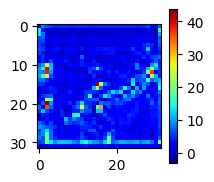

In [19]:
# Sum across channels to obtain the final heat map
heat_map = weighted_feature_maps[8].sum(axis=-1)
# Visualize the heat map
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
print(heat_map[0])
plt.imshow(heat_map[0], cmap='jet')
plt.colorbar()
plt.show()


In [20]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
heat_map_list=[]
# Create a figure with a grid of subplots
for i in range(len(weighted_feature_maps)):
    # Sum across channels to obtain the final heat map
    heat_map_list.append(weighted_feature_maps[i].sum(axis=-1))
print(heat_map_list)



[array([[[-2.1383443e+00,  5.9275979e-01,  3.9396800e-02, ...,
         -3.8108141e+00, -4.8910732e+00, -8.3020535e+00],
        [-8.6977863e+00,  2.5385696e-01,  3.4786761e-03, ...,
          2.0848183e-01, -1.2324463e-01, -3.1046329e+01],
        [-1.0624717e+01,  1.3469827e-01,  5.1688358e-02, ...,
         -2.3900479e-01, -1.4464803e-01, -3.5178257e+01],
        ...,
        [-4.9824113e-01,  3.5198137e-01,  9.5141959e-01, ...,
         -8.9616127e-02, -5.1805776e-01, -5.6788859e+00],
        [ 5.7813859e-01,  3.5546622e-01,  5.6628680e-01, ...,
         -8.2574457e-02, -4.8146686e-01, -3.2780609e+00],
        [ 1.8207500e+00,  6.1278409e-01,  6.4702868e-01, ...,
         -3.5946113e-01, -7.7802771e-01, -1.2816401e+00]]], dtype=float32), array([[[ 0.16398603,  0.17907496,  0.20154797, ...,  0.07158531,
          0.06831319, -0.00299796],
        [-0.0256308 ,  0.15815637,  0.10334065, ...,  0.03380127,
          0.09591466,  0.01928864],
        [ 0.03617086,  0.046908  ,  0.023268

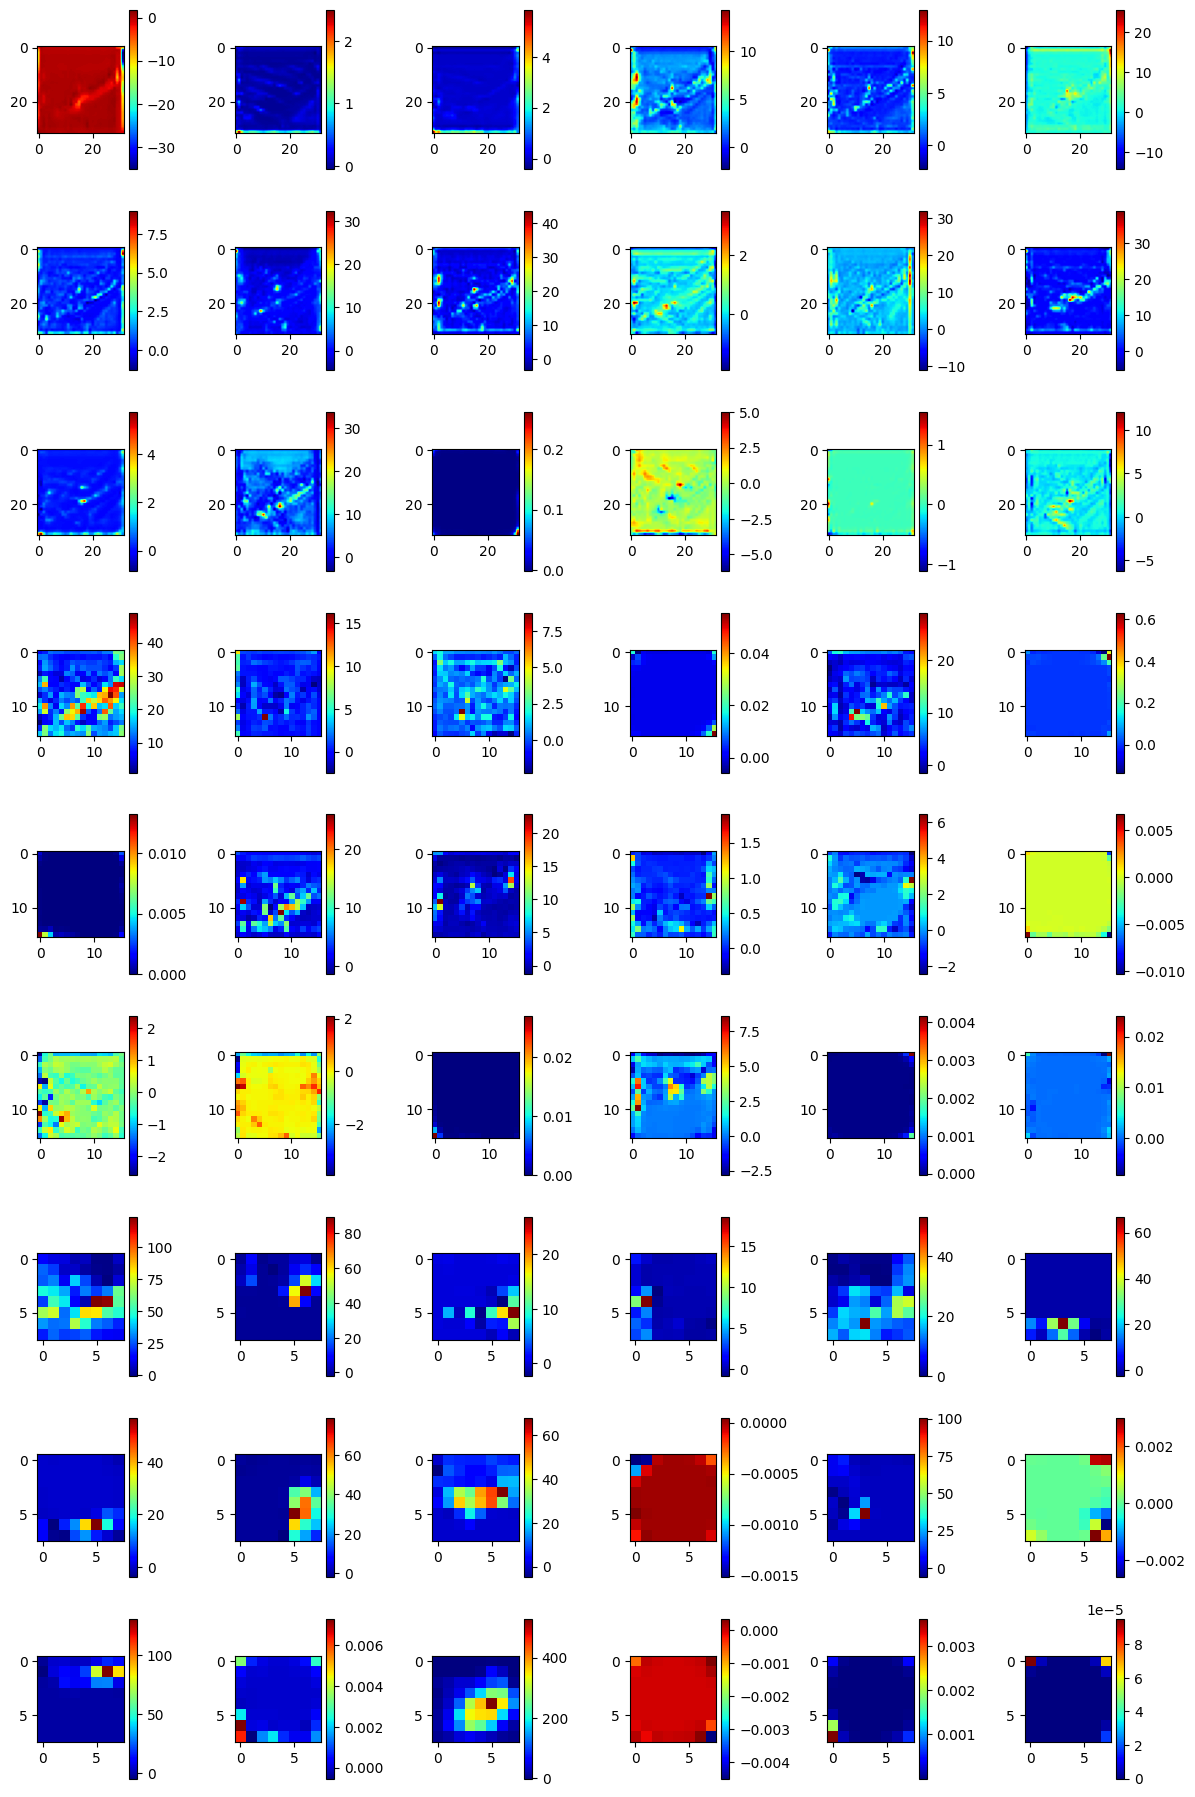

In [28]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
num_subplots = len(heat_map_list)
num_rows = 10
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    im = ax.imshow(heat_map_list[i][0], cmap='jet')
    fig.colorbar(im, ax=ax)

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

# Display all subplots
plt.tight_layout()
plt.show()


In [30]:
# Resize heatmap to match image size
my_image=np.squeeze(my_image, axis=0)
print(f"Image size: {my_image.shape}")
my_heat_map=np.squeeze(heat_map, axis=0)
print(f"Original attention_map size: {my_heat_map.shape}")


ValueError: cannot select an axis to squeeze out which has size not equal to one

In [31]:
normalize_resize_heat_map_list=[]
# Create a figure with a grid of subplots
for heat_map in heat_map_list:
    # Sum across channels to obtain the final heat map
    squeeze_heat_map=(np.squeeze(heat_map, axis=0))
    # Normalize the attention map to be in the range [0, 255]
    heat_map_normalize = np.uint8(255 * (squeeze_heat_map - np.min(squeeze_heat_map)) / (np.max(squeeze_heat_map) - np.min(squeeze_heat_map)))
    my_heat_map_normalize_stretch = cv2.resize(heat_map_normalize, (32, 32), interpolation = cv2.INTER_LINEAR)
    apply_colour_heatmap = cv2.applyColorMap(my_heat_map_normalize_stretch, cv2.COLORMAP_JET)
    heat_map_ = cv2.cvtColor(apply_colour_heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    normalize_resize_heat_map_list.append(heat_map_)
    
print("heat map after normalize_resize:", normalize_resize_heat_map_list)
print(f"Resized attention_map size: {my_heat_map_normalize_stretch.shape}")



heat map after normalize_resize: [array([[[240,   0,   0],
        [164,   0,   0],
        [180,   0,   0],
        ...,
        [255,  28,   0],
        [255,  60,   0],
        [255, 152,   0]],

       [[255, 164,   0],
        [172,   0,   0],
        [180,   0,   0],
        ...,
        [176,   0,   0],
        [184,   0,   0],
        [  0,   0, 240]],

       [[255, 216,   0],
        [176,   0,   0],
        [180,   0,   0],
        ...,
        [188,   0,   0],
        [184,   0,   0],
        [  0,   0, 128]],

       ...,

       [[192,   0,   0],
        [172,   0,   0],
        [152,   0,   0],
        ...,
        [184,   0,   0],
        [196,   0,   0],
        [255,  80,   0]],

       [[164,   0,   0],
        [172,   0,   0],
        [164,   0,   0],
        ...,
        [184,   0,   0],
        [192,   0,   0],
        [255,  16,   0]],

       [[128,   0,   0],
        [164,   0,   0],
        [164,   0,   0],
        ...,
        [192,   0,   0],
        [200,  

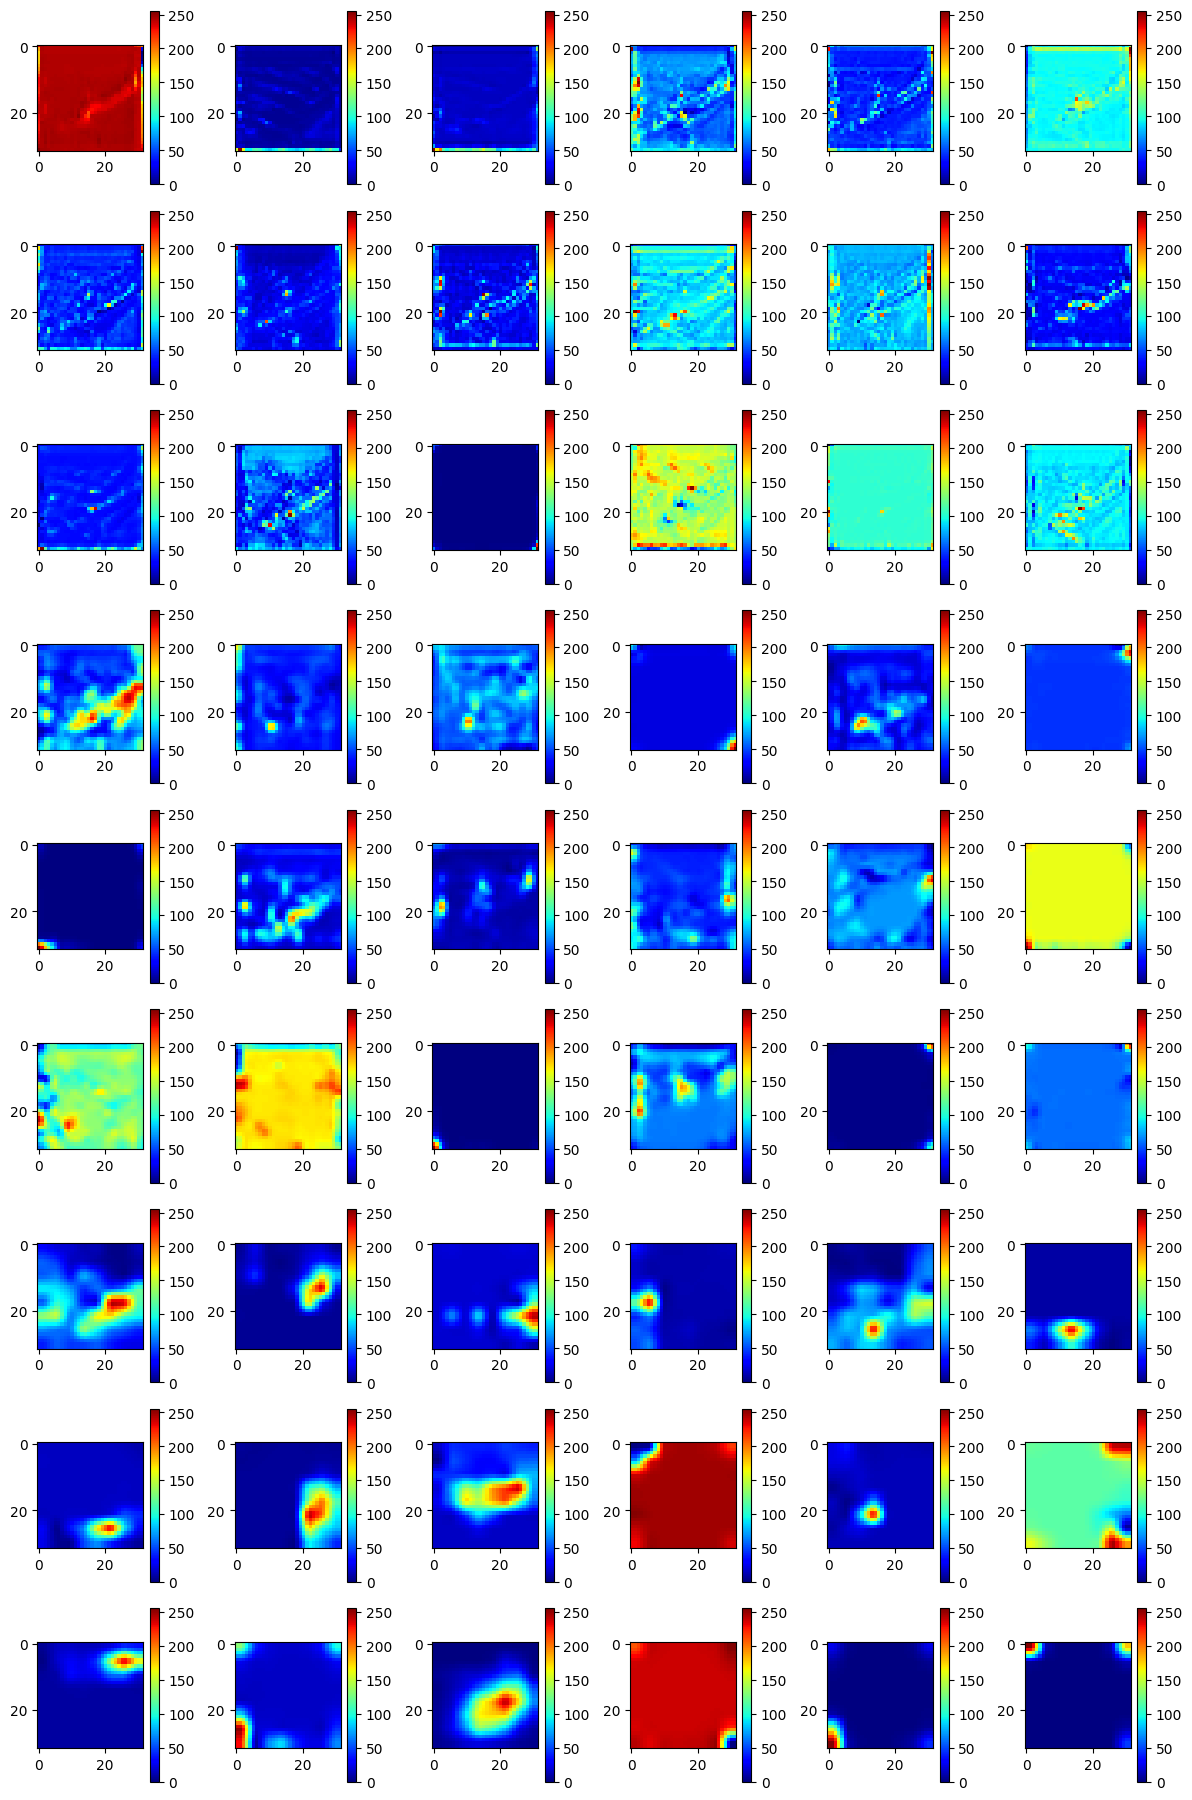

In [33]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)

# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)

num_rows = 10
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
# Create a figure with a grid of subplots
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
        
    im = ax.imshow(normalize_resize_heat_map_list[i], cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

    
# Display all subplots
plt.tight_layout()
plt.show()


In [34]:
my_image= np.array(my_image)
normalize_resize_heat_map_list= np.array(normalize_resize_heat_map_list)


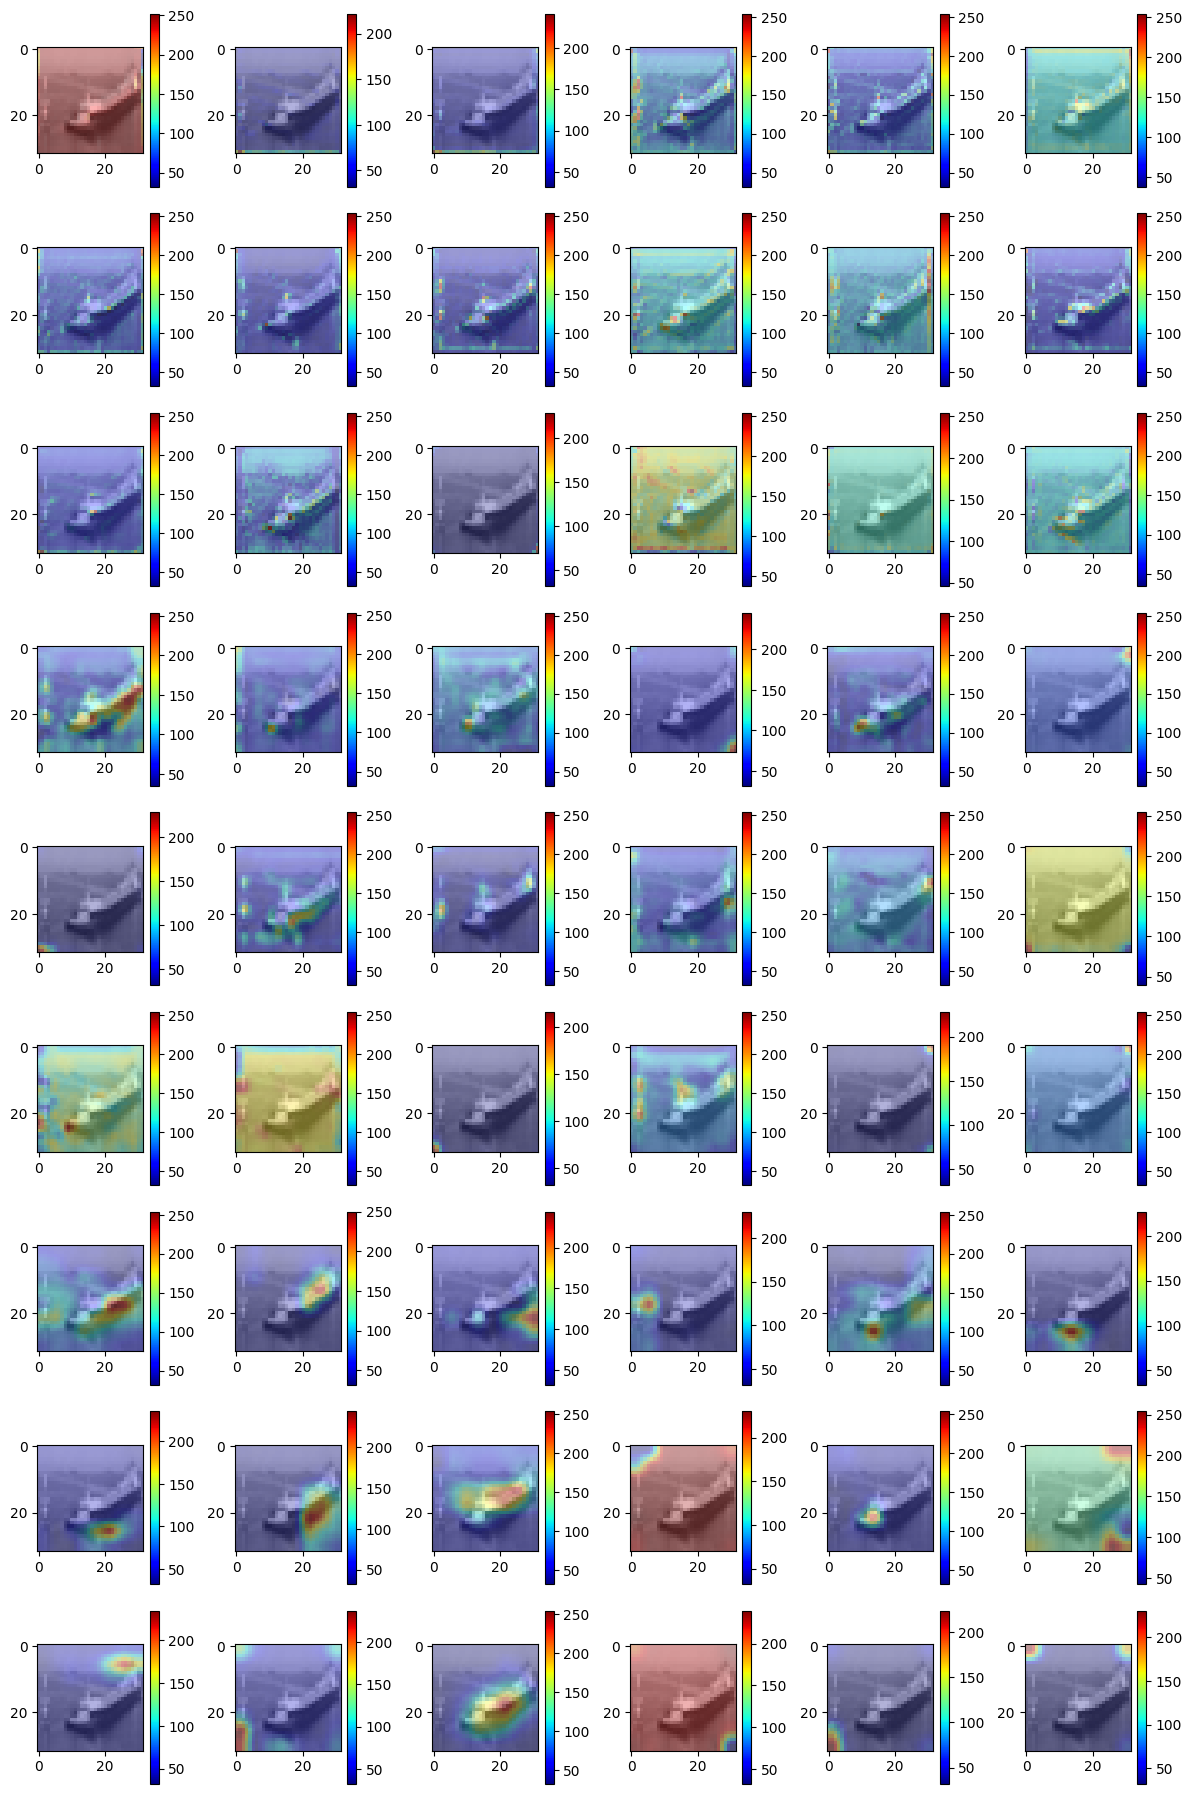

In [35]:
# Blend the images with specified weights
alpha = 0.7  # Weight of the first image
beta = 1.0 - alpha  # Transparency factor for the heatmap # Weight of the second image
gamma = 0    # Scalar added to each sum
# Assuming weighted_feature_maps is a list or array of feature maps
# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)
# Create a figure with a grid of subplots
# Calculate the number of columns needed to fit all subplots in 3 rows
num_rows = 10
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    # Find the correct subplot location
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    blended_image = cv2.addWeighted(my_image1, alpha, normalize_resize_heat_map_list[i], beta, gamma)
    im = ax.imshow(blended_image, cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

